# BLOCK I
### Lesson 2: Causality and Experiments
#### Objectives:
##### 1. Define data science. How do you think you will use Data Science in your career?  
Make large data sets useful in understanding and leveraging the world around us.  
##### 2. What are the three focus areas in this course?  
Exploration, Inference, and Prediction.  
##### 3. Install the datascience package (no Jupyter notebook input required).  
##### 4. Do at least three basic calculations in three separate boxes.


In [8]:
2+2

4

In [9]:
3*5

15

In [10]:
1234314 % 200

114

##### 5. In another box, use python code to print your name followed by a "thumbs up" sign (you may need to do an internet search for Unicode thumbs up character).

In [20]:
print("Ignacio Lara \N{THUMBS UP SIGN}")

Ignacio Lara 👍


##### 6. I read once that violent crime is significantly associated with ice cream sales. That is, as ice cream sales increase, so does violent crime. Do high ice cream sales cause an increase in violent crime? Explain this relationship.
The problem expresses an association. To prove causality, we need to do more work in making sure there are no confounding factors, in other words we need to be sure that there is no reason for the relationship between ice cream sales and violent crime other than the ice cream sales themselves. We do this by looking for any differences between areas with high ice cream sales and those without - for causality, the two groups are similar except for the ice cream sales.
##### 7. What is the difference between an observational study and an experiment?
In an observational study, the scientists play no role in generating the data - they only examine what is occurring naturally.

Lesson 3
===
#### Objectives:
1. Understand the basics of Python, including expressions, operators and variable assignment  
2. Apply basics of Python to solve basic math operations
3. Understand the basics of Tables in Python
***

In [29]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

Seconds elapsed from 1 June 1200 to 14 Aug 0930. 2.5 hours are subtracted in the last step.

In [30]:
secs_in_hr = 60*60
hrs_in_day = 24
full_days = 74
secs_in_hr*(hrs_in_day*full_days-2.5)

6384600.0

Import a table `world_population.csv` and find:    
+ Population in 2016
+ Population growth between 1950 and 2016
+ Annual growth rates over the course of the dataset.

In [32]:
pop_data = Table.read_table('Data/world_population.csv')
pop_arr = pop_data.to_array()
## pop_arr has format (####,). Since there is only one entry of dtype = 'Population',>i8
## the actual number is accessed either with [i]['Population'] or [i][0]
print("Population in 2016: " + str(pop_arr[65][0]))
print("Growth from 1950: " + str(pop_arr[65][0]-pop_arr[0][0]))
#pop_data.with_column('YY% Growth',pop_data.apply('YY% Growth',lambda )

Population in 2016: 7256490011
Growth from 1950: 4698861357


4) The ‘Titanic’ dataset describes passengers on the Titanic when it sank. Url:
https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv.
Information about this dataset can be found at a kaggle site
(https://www.kaggle.com/c/titanic). Import this dataset and answer the following
questions:
a. Relabel the ‘Pclass’ column to ‘passenger_class’.  
b. Create a new column ‘family_size’ that adds the number of siblings/spouses, ‘SibSp’, to the number of children, ‘Parch’.
c. Create a barplot of number of passengers, broken down by passenger class.
HINT: you will need to use the group method on the dataset; for more info, see
the datascience package help.
d. Sort the data by age and show the youngest 5 passengers.
e. Now sort by age from oldest to youngest and show the oldest 5 passengers.
What did you notice? Eliminate these “nan” values and try again.
f. Find the survival rate for passengers of the Titanic, broken down by passenger
class. (HINT: select the columns you care about and then apply the group
method, summarizing with the mean.)
g. Now that you have some familiarity with the dataset, create two of your own
questions and answer them.

In [35]:
# Part a
tit_tbl = Table.read_table('https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv')
tit_tbl.relabel('Pclass','passenger_class')

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


passenger_class,Survived mean
1,0.62963
2,0.472826
3,0.242363


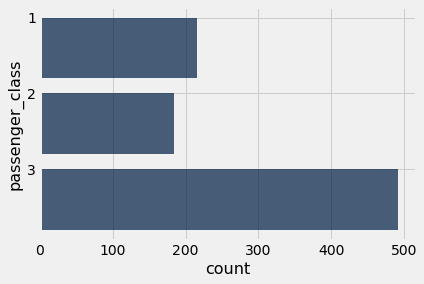

In [37]:
# Part b
tit_tbl_mod = tit_tbl.with_column('family_size',tit_tbl.apply(lambda x, y: x + y, 'SibSp','Parch'))
tit_tbl_mod.show(10)

# Part c
pax_class = tit_tbl_mod.group('passenger_class')
pax_class.barh('passenger_class')

# Part d
tit_tbl_mod.sort('Age').show(5)

# Part e
tit_tbl_mod.where('Age',are.strictly_between(0,1024)).sort('Age',descending=True).show(5)

# Part f
surv = tit_tbl_mod.select('Survived','passenger_class')
surv.group('passenger_class',np.mean)

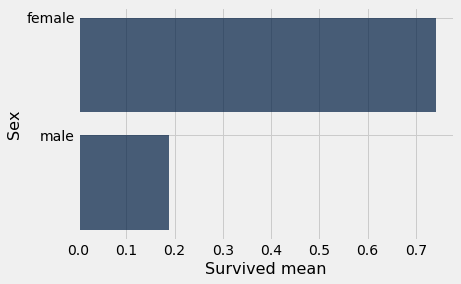

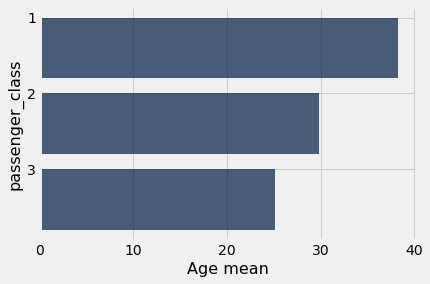

In [38]:
# Part g
# 1) Which sex had a higher survival rate?
tit_tbl_mod.select('Survived','Sex').group('Sex',np.mean).barh('Sex')
# 2) What was the average age of passengers in each class (excluding NaN passengers)?
tit_tbl_mod.where('Age',are.strictly_between(0,1024)).select('passenger_class','Age').group('passenger_class',np.mean).barh('passenger_class')

Lesson 4
===
#### Objectives:
1. Understand the difference between ‘number’ and ‘string’ data types
2. Apply basic string methods
3. Define and apply comparisons
***
1. Create 3 variables for name (first and last), age and hometown. Assign to these variables your own name, age and hometown. Now, recreate the following sentence using variable assignment and the ‘print’ command in Python: “I am &lt;Your name here&gt;. I am &lt;age&gt; years old. I’m from &lt;hometown&gt;"  
a) Now, use a string method to make your name lower case. Print the all lower case version of your name.  
b) Now use a string method to make your full name a proper noun. Print this version of your name.

In [39]:
name = "Ignacio Lara"
age = 20
home = "Houston, TX"
sentence = "I am " + name + ". I am " + str(age) + " years old. I'm from " + home
print(sentence)
print(name.lower())
print(name.title())

I am Ignacio Lara. I am 20 years old. I'm from Houston, TX
ignacio lara
Ignacio Lara


2. Using the ‘replace’ method, replace all “I am” with “he is” or “she is” and all “I’m” with “he’s” or “she’s”.
3. Return a boolean response indicating whether the length of your original sentence (in 1) is greater than your age plus 40.

In [40]:
# Part 2
sent2 = sentence.replace("I am", "he is").replace("I'm","he's")
print(sent2)
# Part 3
len(sentence) > age+40

he is Ignacio Lara. he is 20 years old. he's from Houston, TX


False